In [2]:
import numpy as np
import sympy as sp
import pandas as pd
import time
import matplotlib.pyplot as plt

# Mandelbrot Set

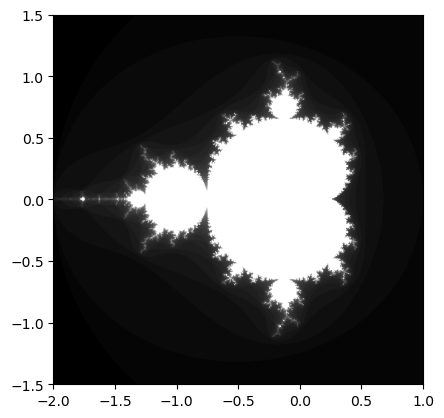

In [9]:
# Determines if c is part of the mandelbrot set
def determine_set(c, threshold):
    z = 0
    for i in range(threshold):
        if abs(z) > 2:
            return i # number of iterations to diverge
        z = z**2 + c
    return threshold # c is part of the set

# Creates the mandelbrot set grid
def mandelbrot(width, height, threshold):
    # Construct grid of points
    x = np.linspace(-2, 1, width)
    y = np.linspace(-1.5, 1.5, height)
    mask = np.zeros((height, width))

    # Mandelbrot iterations
    for i in range(height):
        for j in range(width):
            c = complex(x[j],y[i])
            mask[i, j] = determine_set(c, threshold)
    return mask

# Plot mandelbrot set
mask = mandelbrot(500,500,50)
plt.imshow(mask, extent=[-2,1,-1.5,1.5])
plt.gray()
plt.savefig('mandelbrot.png')
plt.show()

# Markov Chain

In [10]:
# Create normalized matrix 
def random_normalized_matrix(n, m):
    P = np.random.rand(n,m)
    P_normalized = P / P.sum(axis=1, keepdims=True) # keepdims to keep dimensions
    return P_normalized

# Create normalized vector
def random_normalized_vector(n):
    p = np.random.rand(n,1)
    p_normalized = p / p.sum()
    return p_normalized

# Apply transition rule 
def transition_rule(P, p, num_times):
    for i in range(num_times):
        p = np.dot(P.T,p)
    return p

# Compute eigenvector corresponding to eigenvalue 1
def compute_eigenvector(P):
    eigenvalue, eigenvector = np.linalg.eig(P.T)
    index = np.argmin(np.abs(eigenvalue - 1)) # Get index of eigenvalue closest to 1
    v = np.real(eigenvector[:,index]) # Obtain real part of corresponding eigenvector
    v_normalized = v / v.sum() 
    return v_normalized.reshape(-1,1) # Reshape used to make a col vec

# Compute component-wise difference and check if difference < 1e-5
def compute_difference(transition_vector, stationary_dist):
    difference = abs(transition_vector - stationary_dist)
    return np.all(difference < 1e-5)

P5x5 = random_normalized_matrix(5,5)
p5x5 = random_normalized_vector(5)
p50 = transition_rule(P5x5,p5x5,50)
stationary_dist = compute_eigenvector(P5x5)
difference = compute_difference(p50,stationary_dist)

print(f'Random 5 x 5 Normalized P:\n {P5x5}\n')
print(f'Random Size-5 Normalized Vector p:\n {p5x5}\n')
print(f'Applying transition rule 50 times: \n{p50}\n')
print(f'Stationary Distribution: \n{stationary_dist}\n')
print(f'Component-wise difference between p50 and stationary distribution: \n{difference}')

Random 5 x 5 Normalized P:
 [[0.16756793 0.33817528 0.35390011 0.06749585 0.07286083]
 [0.2438834  0.26040166 0.11416226 0.230265   0.15128769]
 [0.24902399 0.24870988 0.15720481 0.14533415 0.19972717]
 [0.04833744 0.35242188 0.14507201 0.16578513 0.28838355]
 [0.01269857 0.20222301 0.23909099 0.28927547 0.25671196]]

Random Size-5 Normalized Vector p:
 [[2.37928429e-01]
 [2.72237455e-01]
 [1.48654465e-06]
 [1.78485083e-01]
 [3.11347546e-01]]

Applying transition rule 50 times: 
[[0.15127518]
 [0.27599937]
 [0.18875817]
 [0.18893689]
 [0.1950304 ]]

Stationary Distribution: 
[[0.15127518]
 [0.27599937]
 [0.18875817]
 [0.18893689]
 [0.1950304 ]]

Component-wise difference between p50 and stationary distribution: 
True


# Taylor Series Approximation

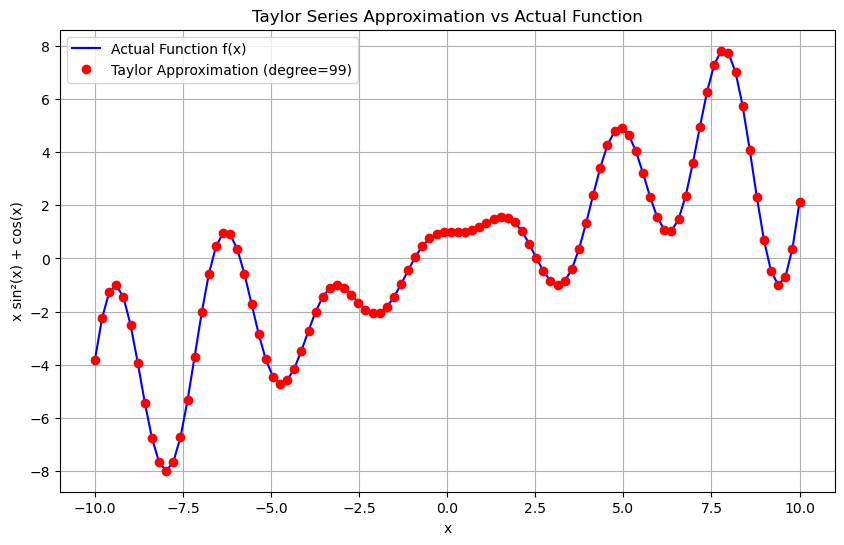


Error and Timing Analysis
   Degree         Error      Time
0      50  4.949573e+01  0.062749
1      60  1.754188e-03  0.056390
2      70  1.577951e-07  0.061102
3      80  1.354434e-07  0.065156
4      90  1.354434e-07  0.077053
5     100  1.354434e-07  0.136923


In [ ]:
# Returns endpoints approximating a given function
def taylor_approx(func, start, end, degree, fixed_c):
    x = sp.Symbol('x')
    taylor_series = 0

    # Create a symbolic taylor series
    for n in range(degree + 1):
        f_n = func.diff(x, n) # Get derivative 
        term = (f_n.subs(x, fixed_c) / np.math.factorial(n)) * (x - fixed_c)**n # Get each series term
        taylor_series += term # Combine terms to get whole series

    # Initialize x-values and plug into approx function
    x_values = np.linspace(start, end, 100)
    f_hat = sp.lambdify(x, taylor_series, 'numpy')(x_values)

    return f_hat

# Error of approximated function 
def f(func, start, end, fixed_c, initial_degree, final_degree, degree_step):
    x = sp.Symbol('x')
    x_values = np.linspace(start, end, 100)
    actual_function = sp.lambdify(x, func, 'numpy')(x_values)

    results = [] # Store all approximations

    # Run function for various cutoff values
    for m in range(initial_degree, final_degree + 1, degree_step):
        start_time = time.time() 
        f_hat = taylor_approx(func, start, end, m, fixed_c)
        end_time = time.time() - start_time

        # Sum of absolute differences
        error = np.sum(np.abs(actual_function - f_hat))
        results.append({'Degree': m, 'Error': error, 'Time': end_time})

    # Make csv file
    df = pd.DataFrame(results)
    df.to_csv("taylor_values.csv", index=False)
    return df

# Entire procedure to taylor approximating function
x = sp.Symbol('x')
f = x * sp.sin(x)**2 + sp.cos(x)

# Initialize parameters
start, end = -10, 10
degree = 99
fixed_c = 0

# Approximate function
x_values = x_values = np.linspace(start, end, 100)
f_hat = taylor_approx(f, start, end, degree, fixed_c)
f_true = sp.lambdify(x, f, 'numpy')
y_true = f_true(x_values)

# Plot actual function and approximated function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_true, label='Actual Function f(x)', color='blue')
plt.plot(x_values, f_hat, 'o', label=f'Taylor Approximation (degree={degree})', color='red')
plt.xlabel('x')
plt.ylabel('x sin²(x) + cos(x)')
plt.title('Taylor Series Approximation vs Actual Function')
plt.legend()
plt.grid(True)
plt.show()

# Print error
print("\nError and Timing Analysis")
df = taylor_error_analysis(f, start, end, fixed_c, 50, 100, 10)
print(df)
